# **Result statistics**

In [1]:
#import
import os
import sys
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

In [2]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/CNNDetection-master'
result_dir_from_root = 'results/Davis-480p'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/CNNDetection-master/results/Davis-480p


In [3]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  4
Dataset name : Davis-2016-480p-Propainter, number of real videos : 49, number of fake videos : 49
Number of dataset :  4
Dataset name : Davis-2017-480p-Propainter, number of real videos : 89, number of fake videos : 88
Number of dataset :  4
Dataset name : Davis-2016-480p-DiffuEraser, number of real videos : 49, number of fake videos : 49
Number of dataset :  4
Dataset name : Davis-2017-480p-DiffuEraser, number of real videos : 89, number of fake videos : 89


## **Ploting some results**

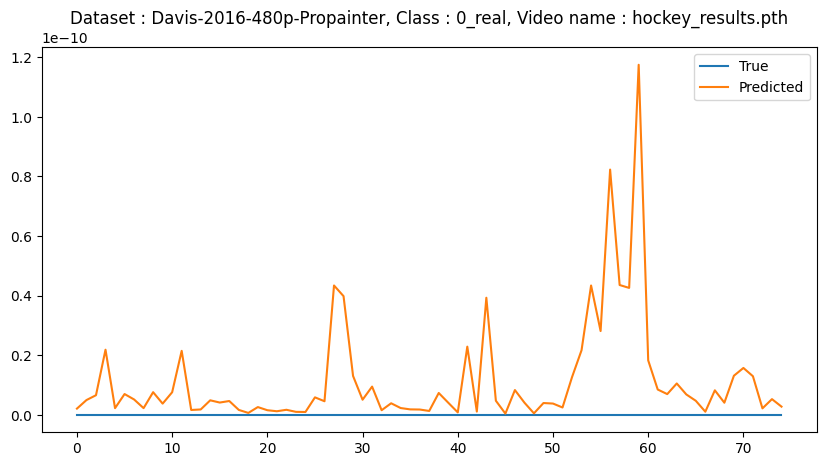

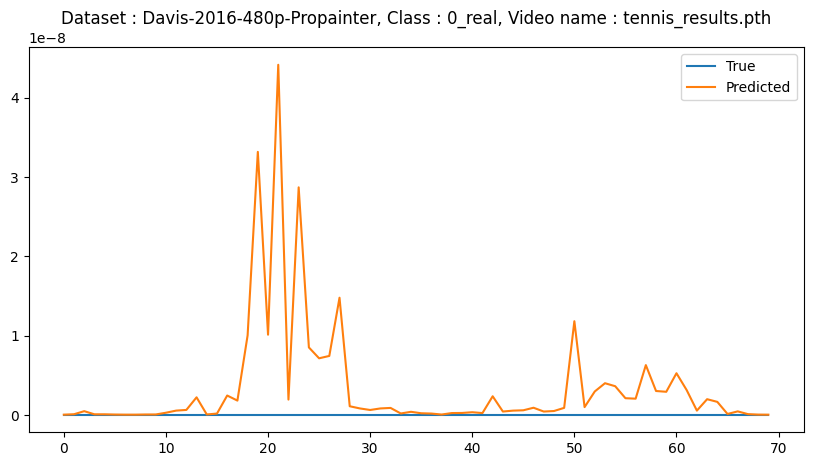

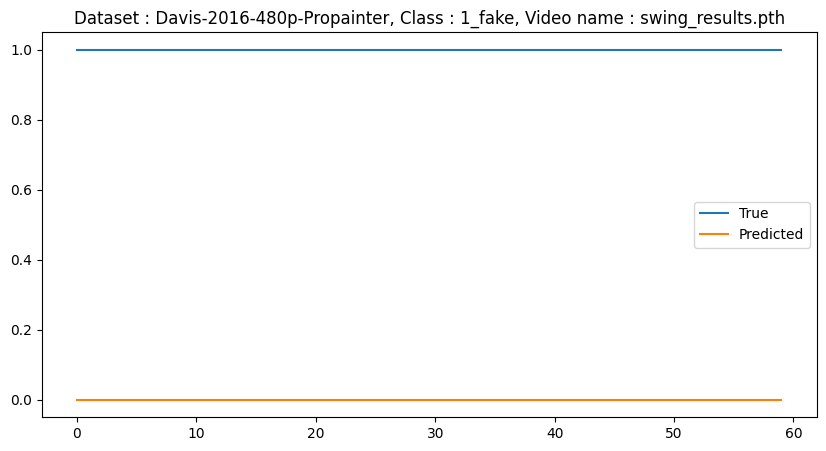

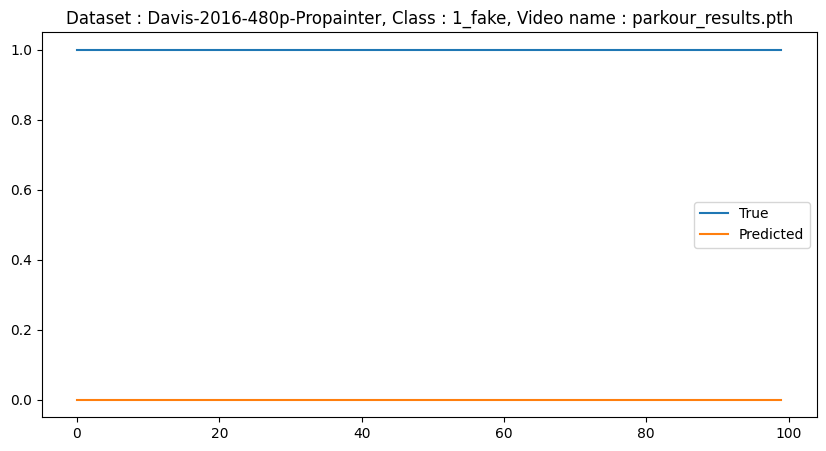

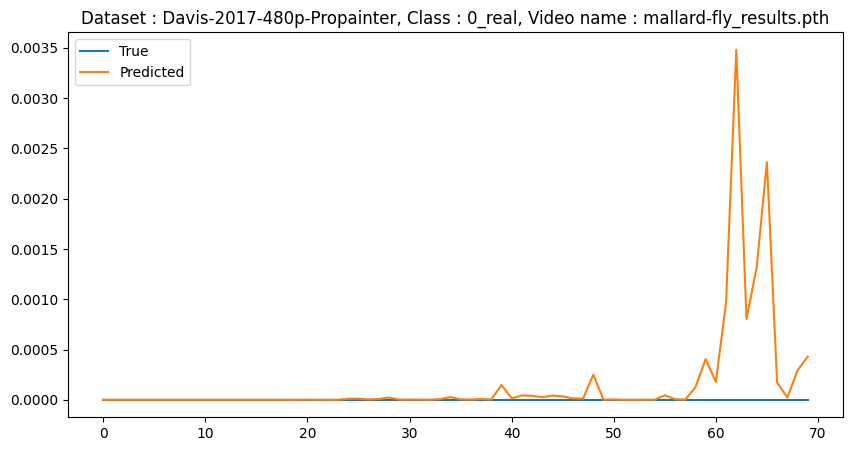

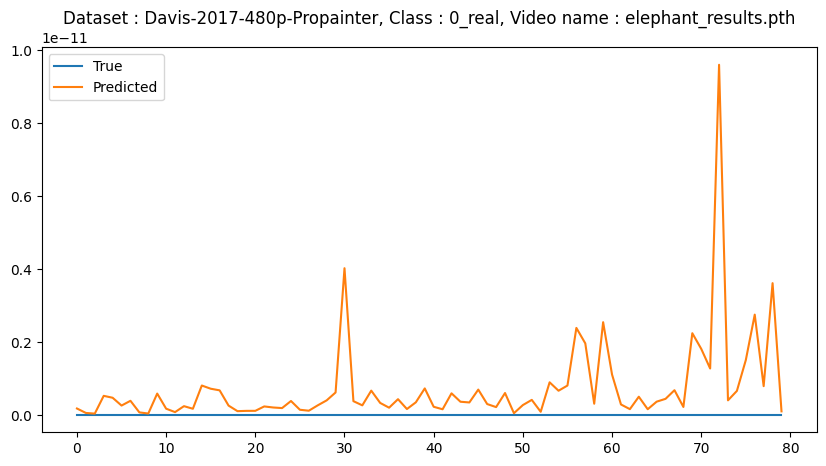

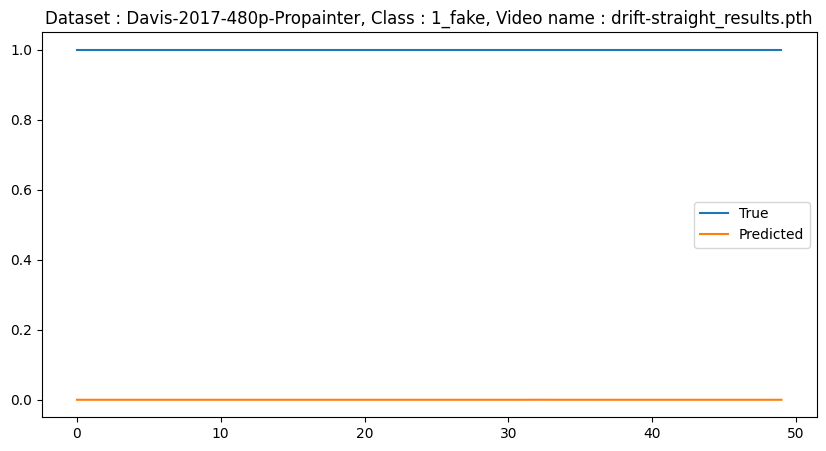

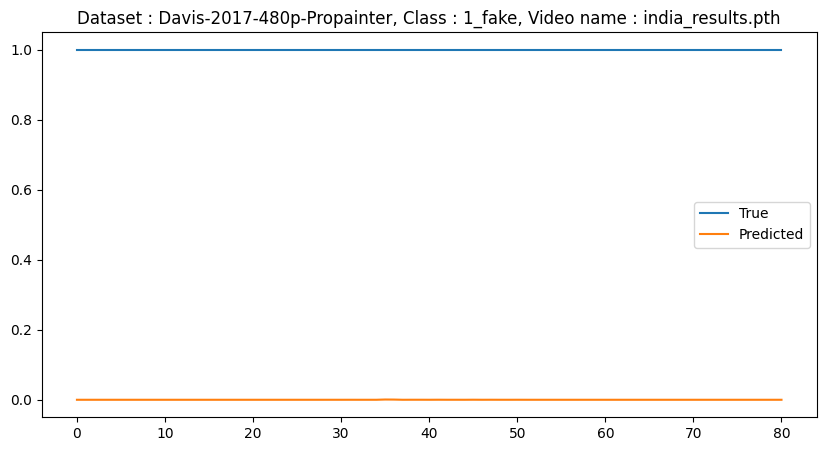

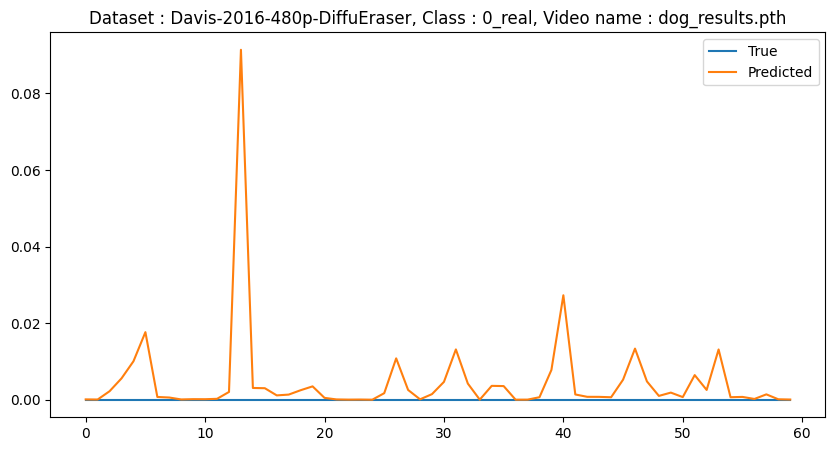

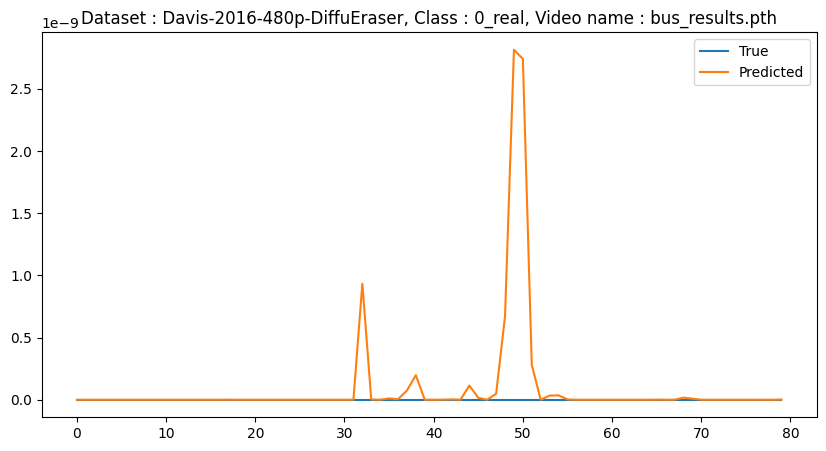

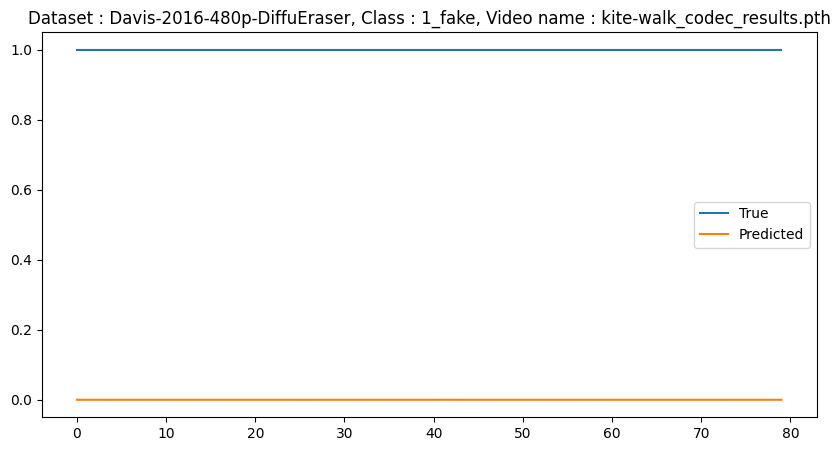

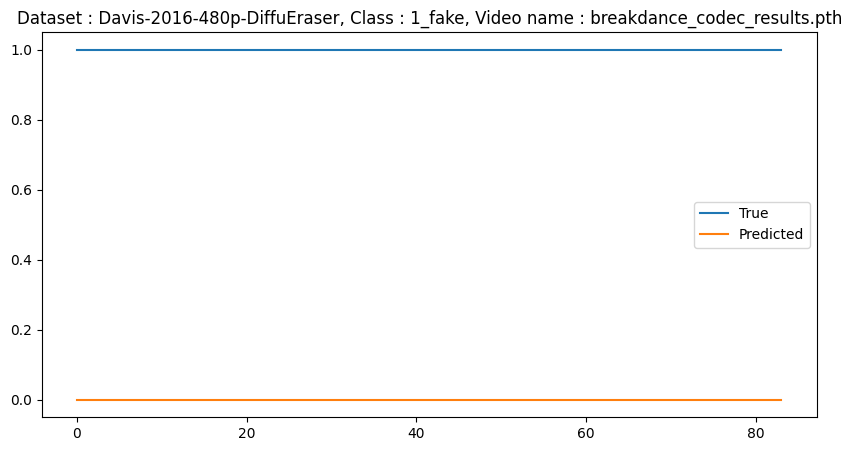

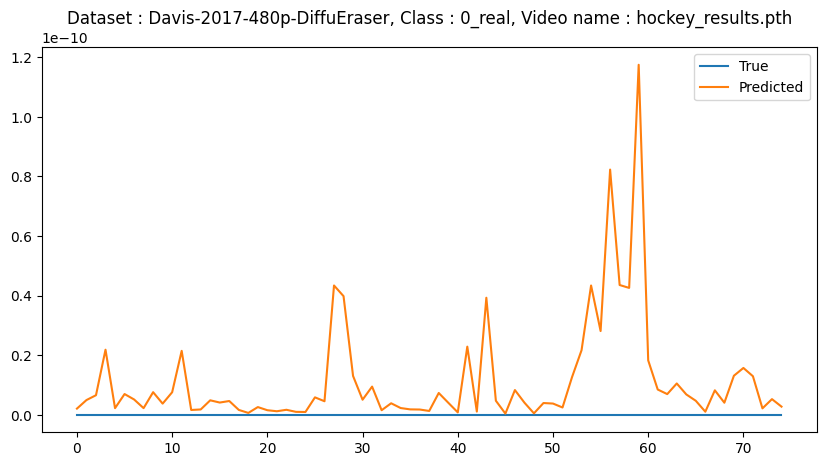

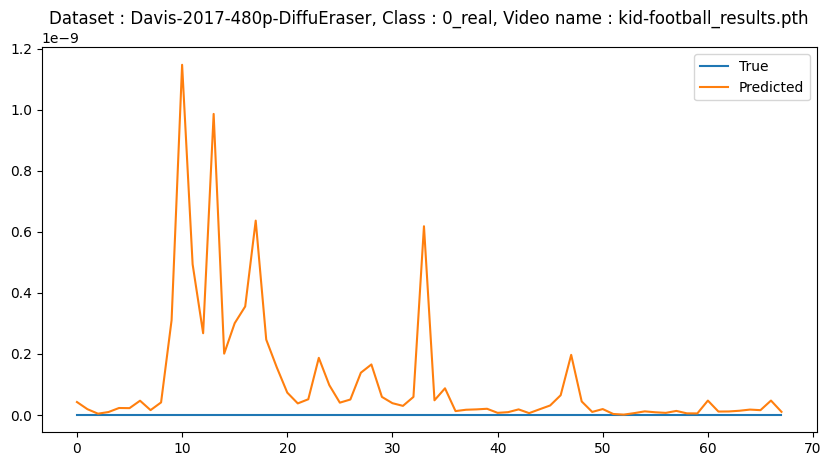

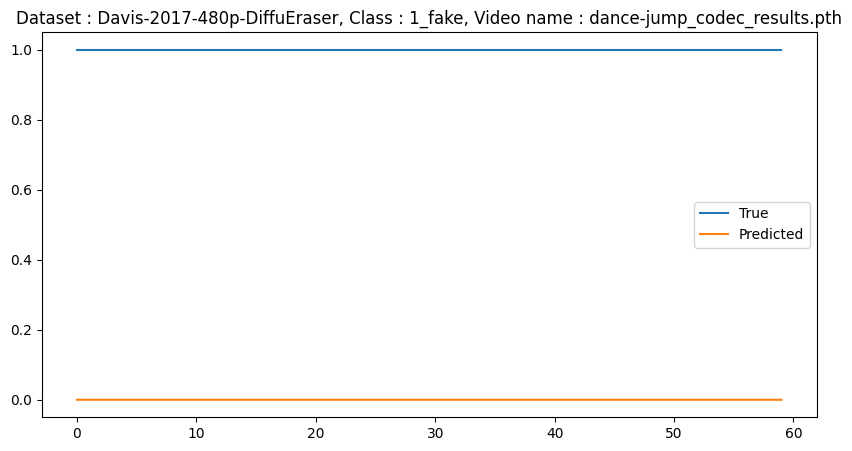

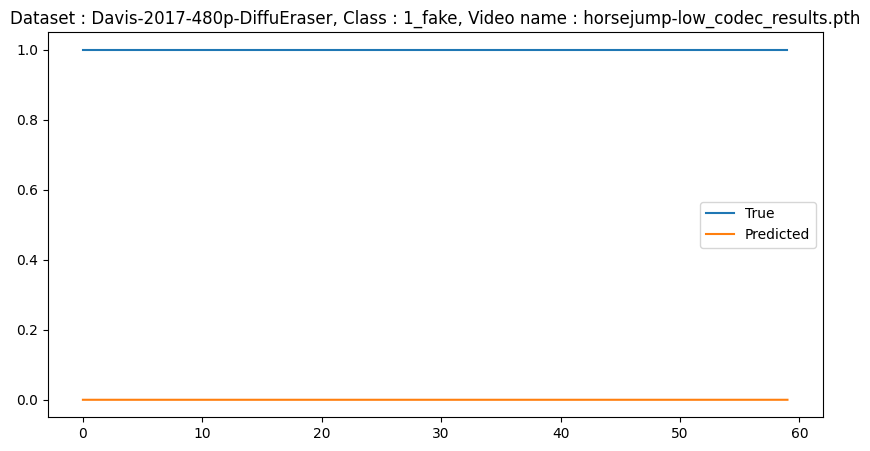

In [4]:
max_number_dataset = -1
max_number_video = 2

for dir in dataset_list_dir:
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        num_of_videos = min(len(files), max_number_video)
        list_of_videos = random.sample(files, num_of_videos)
        for video in list_of_videos:
            #print(f"\nDataset : {dir}, Class : {video_class}, Video name : {video}")
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            #print(f"Loaded tensor shape : {loaded_tensor.shape}")
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]

            # Plotting
            plt.figure(figsize=(10, 5))
            plt.plot(y_true, label='True')
            plt.plot(y_pred, label='Predicted')
            plt.legend()
            plt.title(f"Dataset : {dir}, Class : {video_class}, Video name : {video}")
            plt.show()
        


In [5]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : Davis-2016-480p-Propainter
        0_real    1_fake
mean  0.000105  0.000721
std   0.000676  0.002494


Dataset : Davis-2017-480p-Propainter
        0_real    1_fake
mean  0.000060  0.000357
std   0.000502  0.001949


Dataset : Davis-2016-480p-DiffuEraser
        0_real    1_fake
mean  0.000105  0.000766
std   0.000676  0.002746


Dataset : Davis-2017-480p-DiffuEraser
        0_real    1_fake
mean  0.000060  0.000200
std   0.000502  0.001212


